In [78]:
#@title
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###### Importa librerie

In [79]:
#@title
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error
py.init_notebook_mode()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

## Valori di MAPE e MAE:
##**Annuale =  36.91812296540778 ; 2830917.551147114**
##**Trimestrale =  45.86817737839024; 803530.3424423985**
##**Mensile = 12.856096056112449; 87790.66303502768**
##**Settimanale =  20.03474836238095; 31890.358641560233**

## Annuale Pesca

In [80]:
pesca = pd.read_csv ('pesca_annuale.csv')
pesca = pesca[pesca['year']<2022]
pesca.head(2)

Unnamed: 0  year     revenue
0           0  2014  1959710.58
1           1  2015  4202764.36

**Dividiamo in test e train set** 

In [81]:
steps = 2

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

Unnamed: 0    ds           y
6           6  2020  8190939.82
7           7  2021  7506147.47

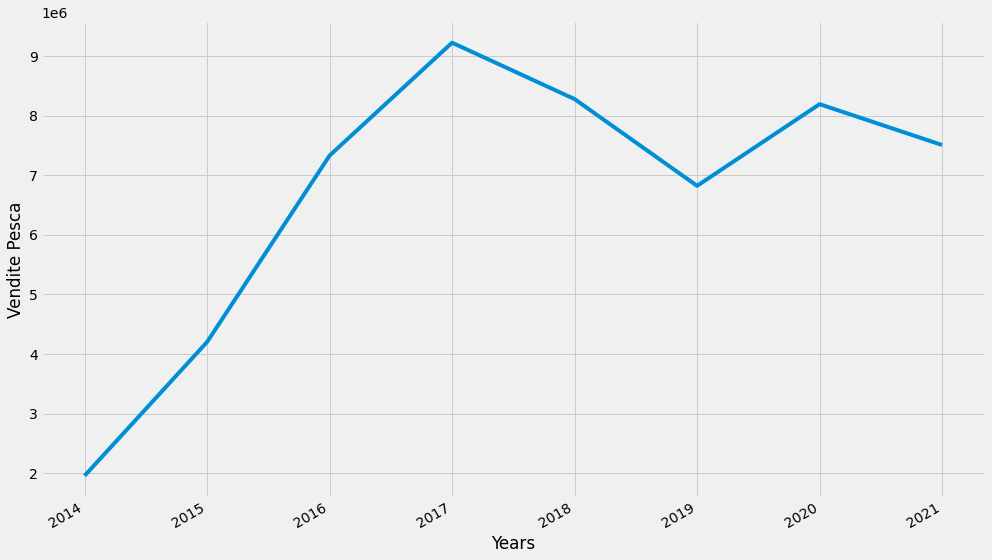

In [82]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['year'], pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

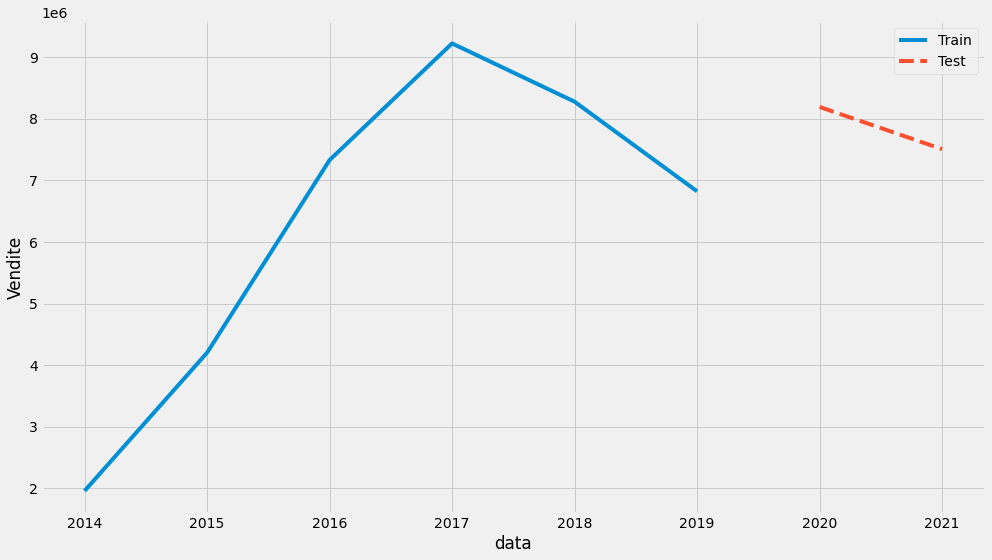

In [83]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [84]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=3)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2020-01-01  8.960398e+06  6.652794e+06  1.262505e+07  8.960398e+06   
1 2021-01-01  1.004920e+07  8.499091e+06  1.454076e+07  1.004920e+07   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  8.960398e+06    6.608337e+05          6.608337e+05          6.608337e+05   
1  1.004920e+07    1.688493e+06          1.688493e+06          1.688493e+06   

         yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0  6.608337e+05  6.608337e+05  6.608337e+05                   0.0   
1  1.688493e+06  1.688493e+06  1.688493e+06                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  9.621232e+06  
1                         0.0                         0.0  1.173769e+07

In [86]:
y_pred_baseline = pesca_train[-steps:]#.values
y_pred_baseline

Unnamed: 0    ds           y
4           4  2018  8275946.33
5           5  2019  6821429.63

In [87]:
# fig, ax = plt.subplots(figsize=(14, 8))
# ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
# ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
# # ax.plot(y_pred_baseline['ds'], y_pred_baseline['y'], ls=':', label='Baseline')
# # ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

# ax.set_xlabel('data')
# ax.set_ylabel('Vendite')

# ax.legend(loc='best')
# plt.tight_layout()
# plt.show()

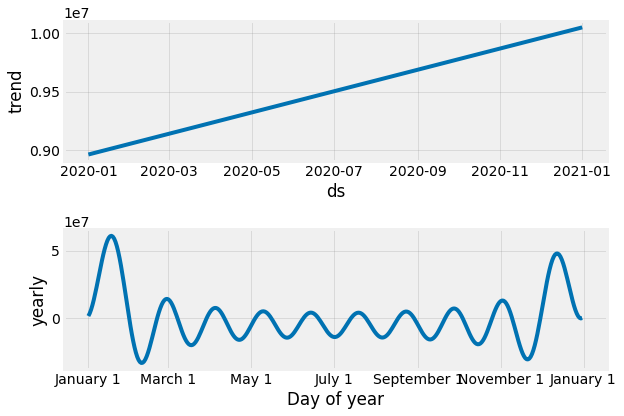

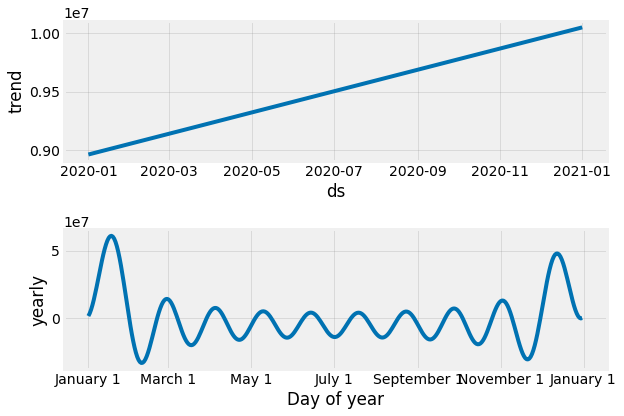

In [88]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 36.91812296540778**
**MAE = 2830917.551147114**

In [89]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 36.91812296540778
MAE: 2830917.551147114


##Trimestrale

In [90]:
pesca = pd.read_csv('pesca_trimestrale.csv', parse_dates=['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year     revenue
30          30 2021-09-30  1620445.53
31          31 2021-12-31  1704044.85

**Dividiamo in test e train set** 

In [91]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

Unnamed: 0         ds           y
26          26 2020-09-30  1727871.52
27          27 2020-12-31  1881887.80
28          28 2021-03-31  2258617.01
29          29 2021-06-30  1923040.08
30          30 2021-09-30  1620445.53
31          31 2021-12-31  1704044.85

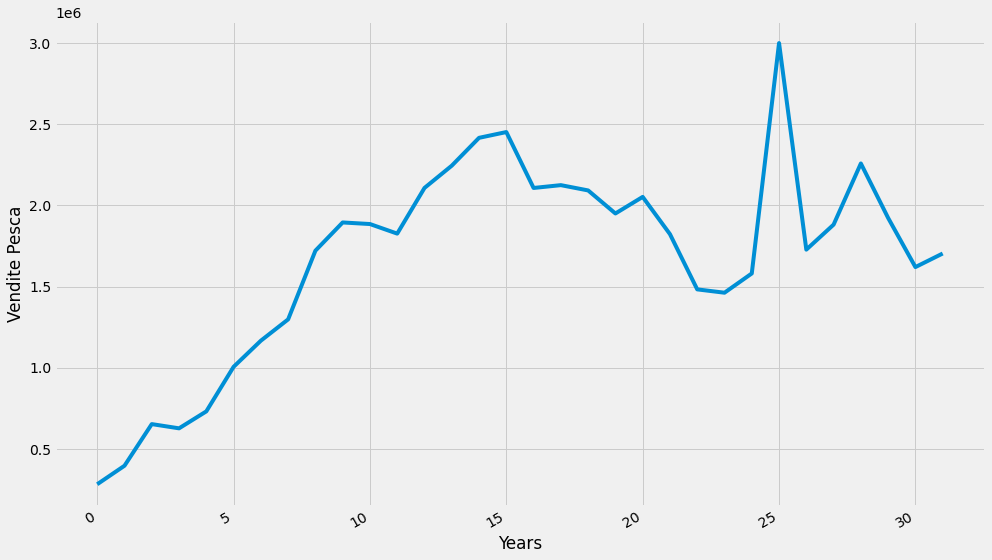

In [92]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

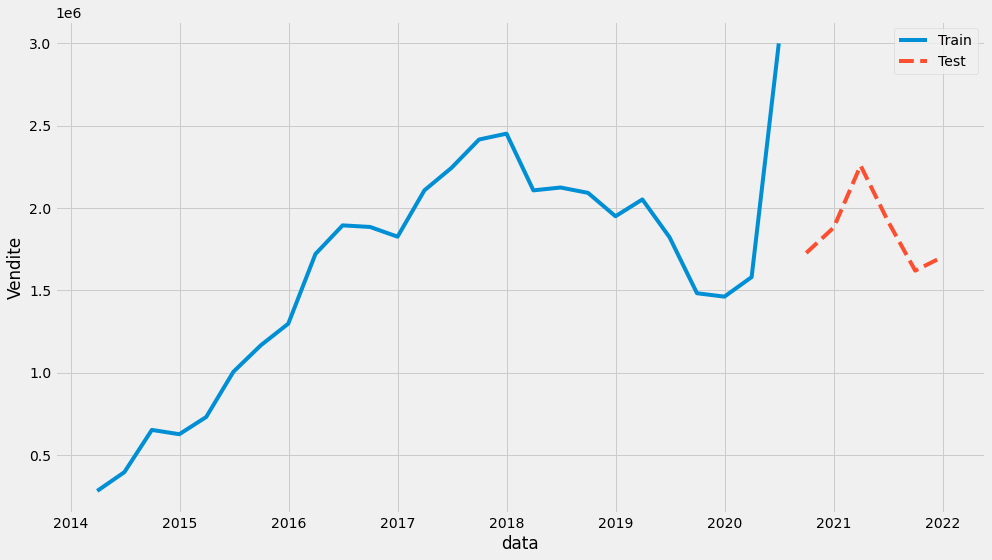

In [93]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [94]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4, weekly_seasonality=True)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [95]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds          trend    yhat_lower    yhat_upper    trend_lower  \
0 2020-09-30   65791.334142  1.806041e+06  2.713937e+06   65790.416818   
1 2020-12-31  121102.572685  2.370544e+06  3.262067e+06  121099.489834   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   65791.952888    2.193410e+06          2.193410e+06          2.193410e+06   
1  121105.418611    2.681486e+06          2.681486e+06          2.681486e+06   

          weekly   weekly_lower   weekly_upper        yearly  yearly_lower  \
0 -267713.709697 -267713.709697 -267713.709697  2.461123e+06  2.461123e+06   
1  121032.549510  121032.549510  121032.549510  2.560454e+06  2.560454e+06   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  2.461123e+06                   0.0                         0.0   
1  2.560454e+06                   0.0                         0.0   

   multiplicative_terms_upper          yhat  
0                         0.0  2.259201e+06  
1                         0.0  2.802589e+06

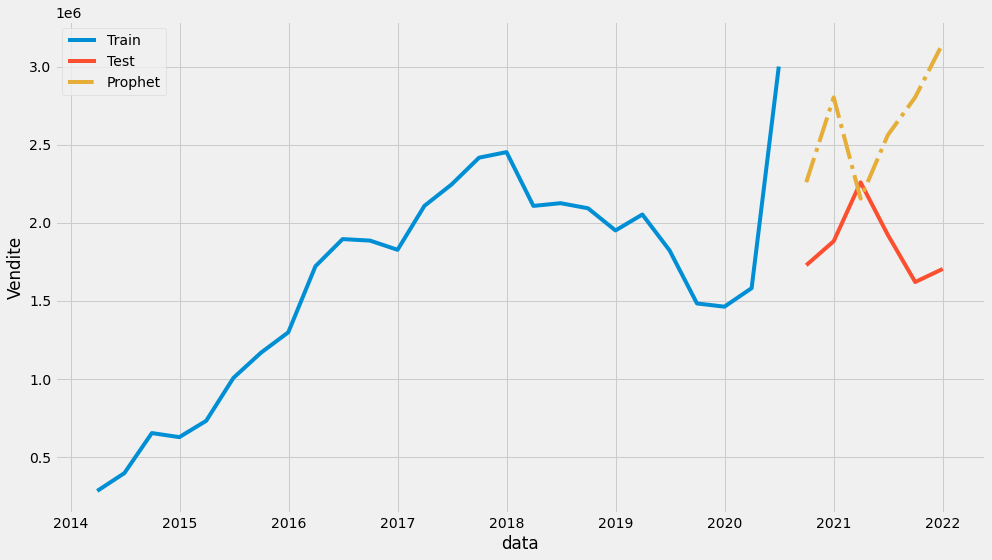

In [96]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
# ax.plot(y_pred_baseline['ds'], y_pred_baseline['y'], ls=':', label='Baseline')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

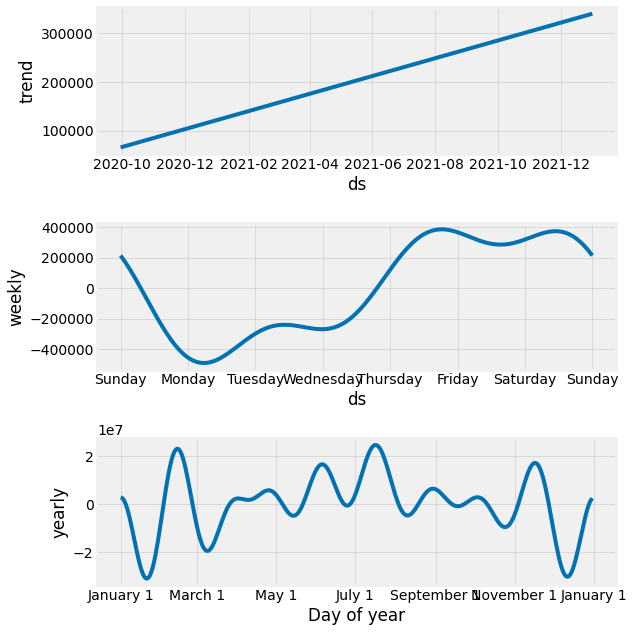

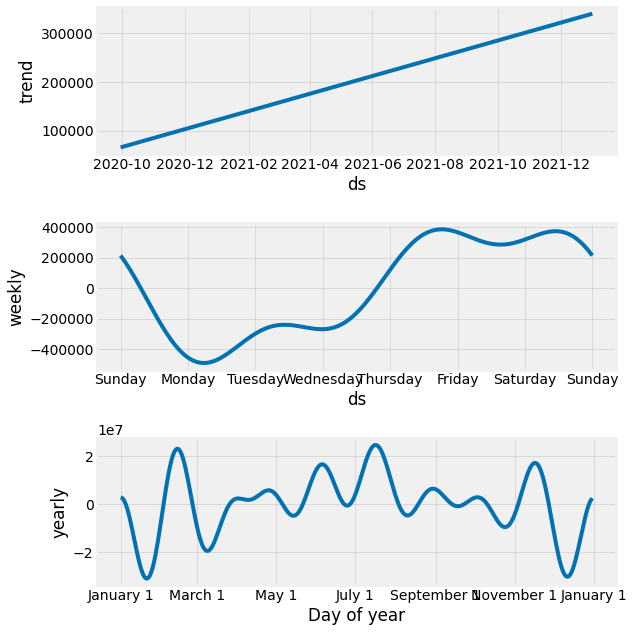

In [97]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 45.86817737839024**
**MAE = 803530.3424423985**

In [98]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 45.86817737839024
MAE: 803530.3424423985


##Mensile

In [99]:
pesca = pd.read_csv('pesca_mensile.csv').rename(columns={'Datetime':'year', 'totale':'revenue'})
pesca['year'] = pd.to_datetime(pesca['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

year    revenue
94 2021-11-30  709360.12
95 2021-12-31  418510.70

**Dividiamo in test e train set** 

In [100]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

ds          y
77 2020-06-30  894853.57
78 2020-07-31  687405.89
79 2020-08-31  487386.30
80 2020-09-30  553079.33
81 2020-10-31  531739.65
82 2020-11-30  610337.83
83 2020-12-31  739810.32
84 2021-01-31  814191.95
85 2021-02-28  603193.05
86 2021-03-31  841232.01
87 2021-04-30  699494.82
88 2021-05-31  719593.94
89 2021-06-30  503951.32
90 2021-07-31  513301.14
91 2021-08-31  587279.98
92 2021-09-30  519864.41
93 2021-10-31  576174.03
94 2021-11-30  709360.12
95 2021-12-31  418510.70

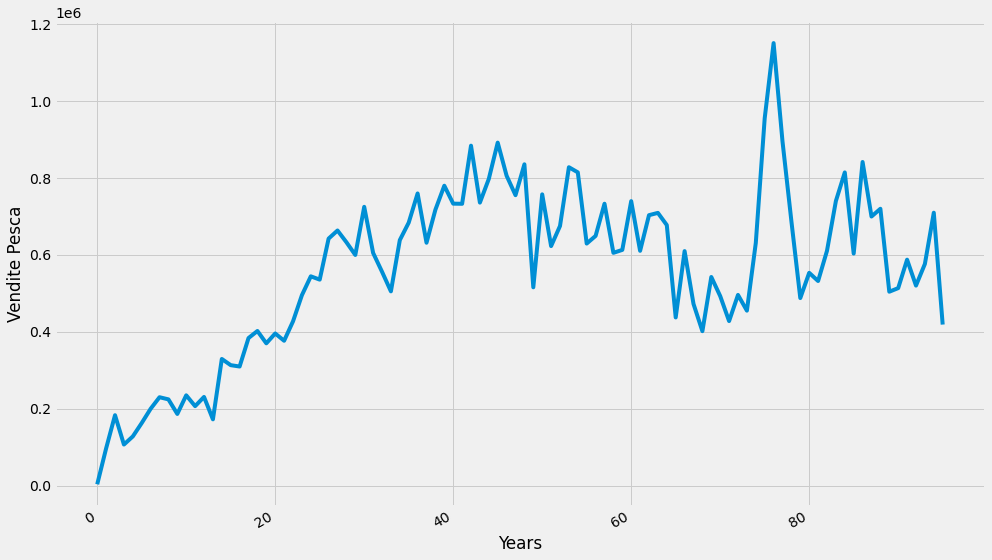

In [101]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

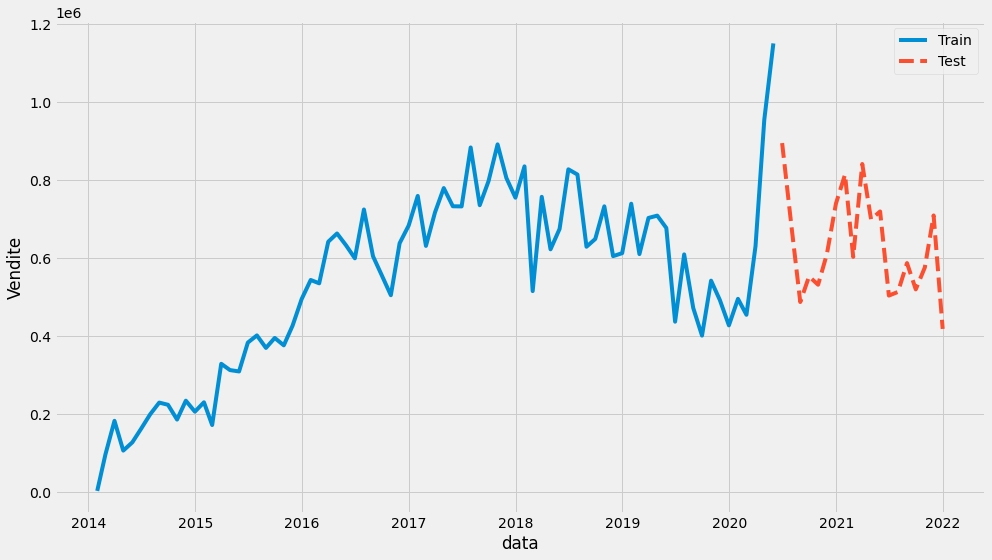

In [102]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [103]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4, weekly_seasonality = True)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2020-06-30  611241.542202  379056.616518  762986.570867  610968.238540   
1 2020-07-31  607835.409110  461265.681229  827193.047719  605150.495474   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  611636.655060   -27831.611965         -27831.611965         -27831.611965   
1  610907.600632    28271.822862          28271.822862          28271.822862   

         weekly  weekly_lower  weekly_upper        yearly  yearly_lower  \
0  20710.056670  20710.056670  20710.056670 -48541.668635 -48541.668635   
1 -28638.436251 -28638.436251 -28638.436251  56910.259113  56910.259113   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0 -48541.668635                   0.0                         0.0   
1  56910.259113                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0  583409.930236  
1                         0.0  636107.231972

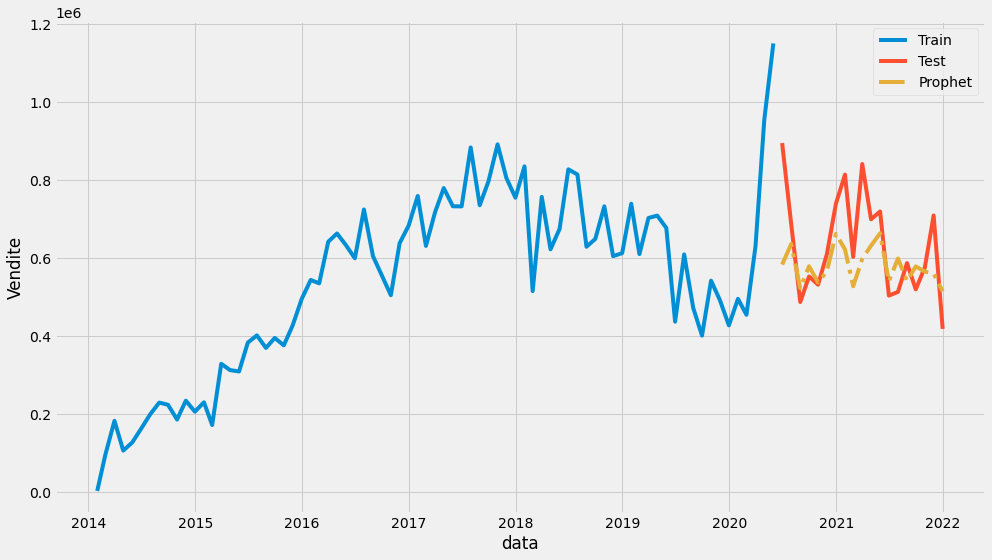

In [105]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
# ax.plot(y_pred_baseline['ds'], y_pred_baseline['y'], ls=':', label='Baseline')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

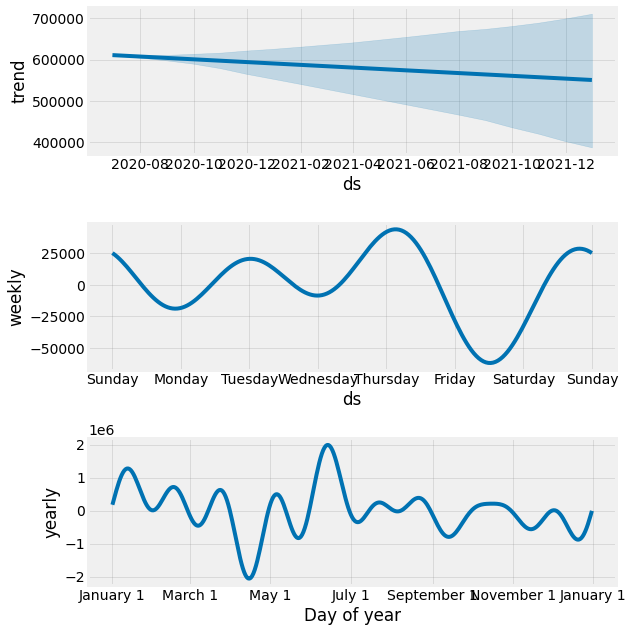

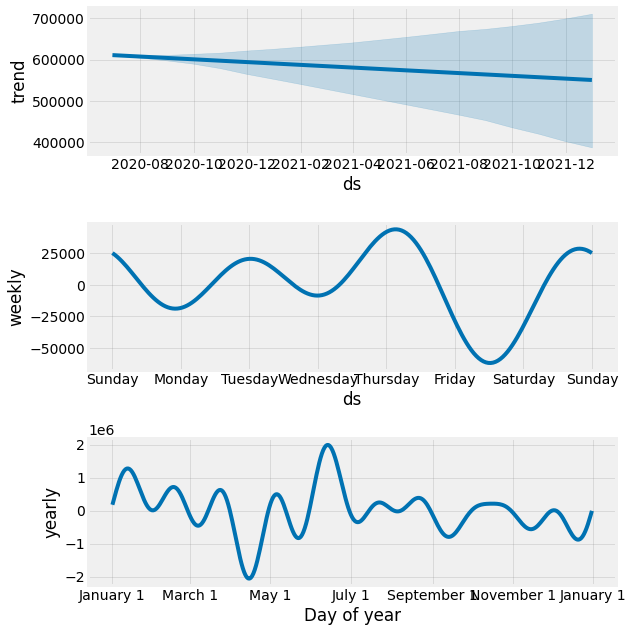

In [106]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 12.856096056112449**
**MAE = 87790.66303502768**

In [107]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 12.856096056112449
MAE: 87790.66303502768


##Settimanale

In [108]:
pesca = pd.read_csv ('pesca_settimanale.csv', parse_dates=['year']) 
pesca = pesca[pesca['year'].dt.year<2022]
pesca.tail(2)

Unnamed: 0       year   revenue
415         415 2021-12-19  98343.61
416         416 2021-12-26  70574.12

**Dividiamo in test e train set** 

In [109]:
steps = round(len(pesca)*0.2)

pesca_train = pesca.iloc[:(len(pesca)-steps)].rename(columns={'year':'ds', 'revenue': 'y'})
pesca_test = pesca.iloc[(len(pesca)-steps):].rename(columns={'year':'ds', 'revenue': 'y'}) # last year for testing
pesca_test

Unnamed: 0         ds          y
334         334 2020-05-31  193686.95
335         335 2020-06-07  188135.90
336         336 2020-06-14  277074.28
337         337 2020-06-21  235418.00
338         338 2020-06-28  149833.56
..          ...        ...        ...
412         412 2021-11-28  237888.83
413         413 2021-12-05  173790.36
414         414 2021-12-12   98639.43
415         415 2021-12-19   98343.61
416         416 2021-12-26   70574.12

[83 rows x 3 columns]

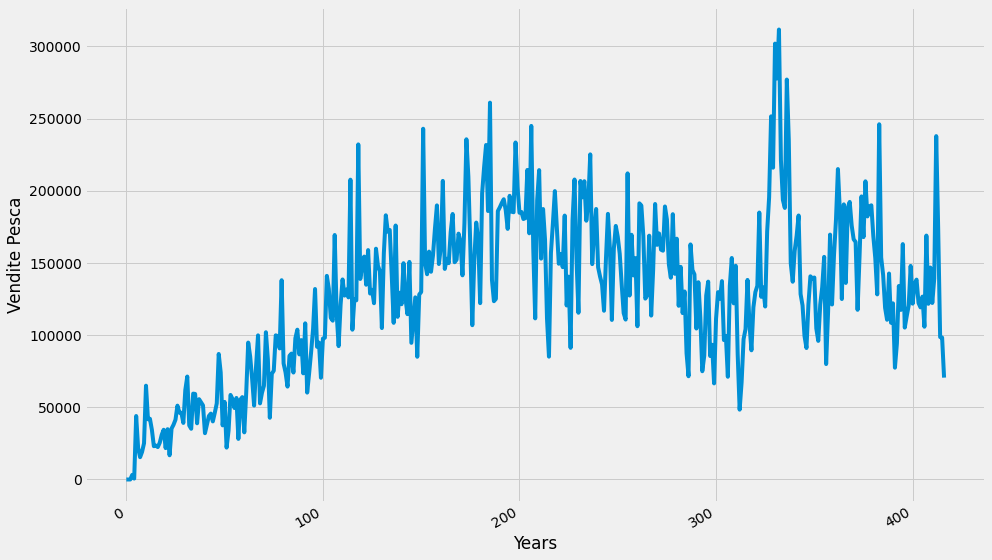

In [110]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca['revenue'])
ax.set_xlabel('Years')
ax.set_ylabel('Vendite Pesca')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()

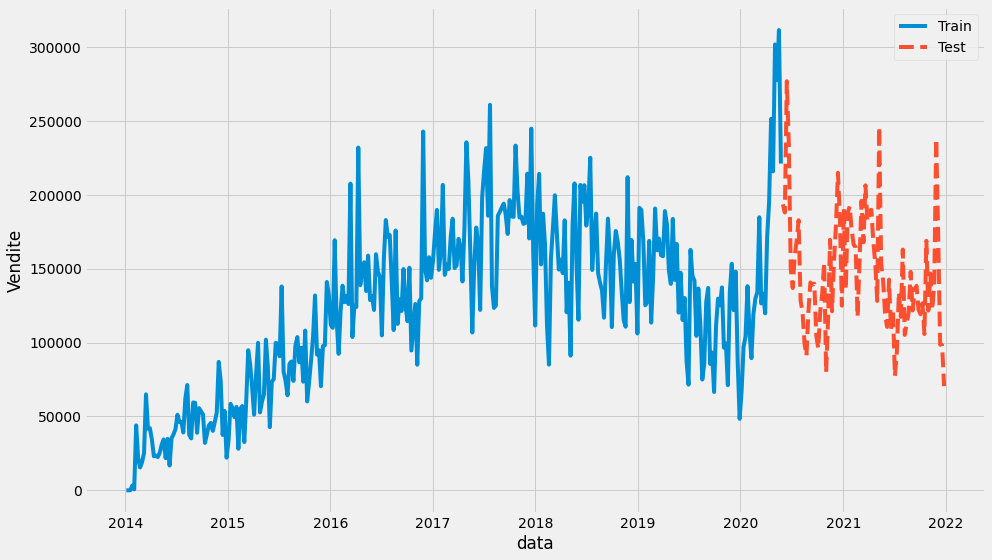

In [111]:
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='--', label='Test')
ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

### Prevediamo le vendite

In [112]:
# Impostiamo il livello di confidenza al 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95, n_changepoints=4, daily_seasonality=True)

# Fittimao il modello sul train set
my_model.fit(pesca_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [113]:
# Prevediamo sul test set
forecasting_model =  my_model.predict(pesca_test)
forecasting_model.head(2)

ds          trend    yhat_lower     yhat_upper    trend_lower  \
0 2020-05-31  125574.282134  76362.654960  197770.729489  125574.282134   
1 2020-06-07  125311.691733  56867.392628  187486.421584  125311.691733   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  125574.282134     7413.511429           7413.511429           7413.511429   
1  125311.691733      461.780238            461.780238            461.780238   

          daily   daily_lower   daily_upper       yearly  yearly_lower  \
0  10023.684644  10023.684644  10023.684644 -2610.173215  -2610.173215   
1  10023.684644  10023.684644  10023.684644 -9561.904406  -9561.904406   

   yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0  -2610.173215                   0.0                         0.0   
1  -9561.904406                   0.0                         0.0   

   multiplicative_terms_upper           yhat  
0                         0.0  132987.793563  
1                         0.0  125773.471971

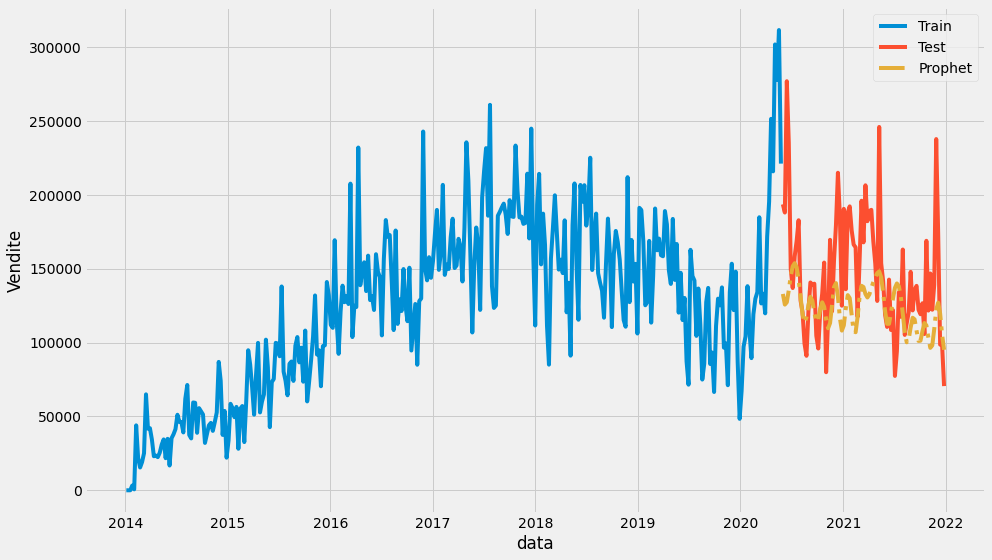

In [114]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(pesca_train['ds'], pesca_train['y'], ls='-', label='Train')
ax.plot(pesca_test['ds'], pesca_test['y'], ls='-', label='Test')
# ax.plot(y_pred_baseline['ds'], y_pred_baseline['y'], ls=':', label='Baseline')
ax.plot(forecasting_model['ds'], forecasting_model['yhat'], ls='-.', label='Prophet')

ax.set_xlabel('data')
ax.set_ylabel('Vendite')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

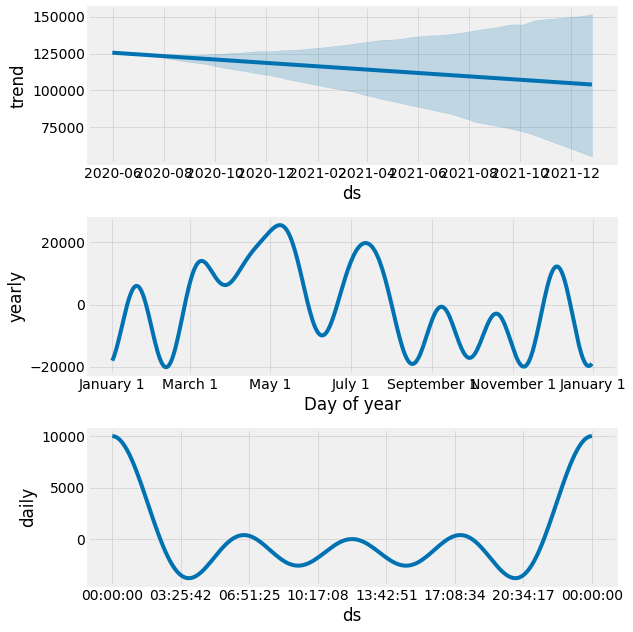

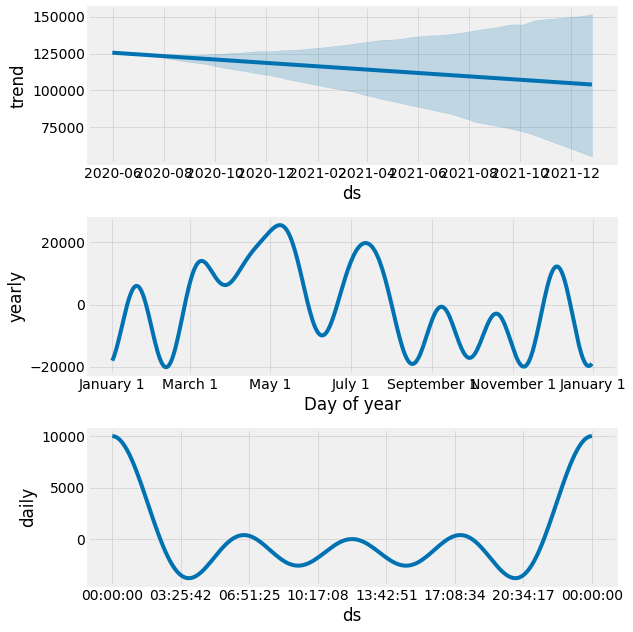

In [115]:
# Componenti del modello (trend, weekly, yearly, daily)
my_model.plot_components(forecasting_model)

**MAPE = 20.03474836238095**
**MAE = 31890.358641560233**

In [116]:
# MAE
def mean_absolute_error(y_true, y_pred):
  """Calculates MAE given y_true and y_pred"""
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs(y_true - y_pred))


# MAPE:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE:', mean_absolute_percentage_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat'])
)
print('MAE:', mean_absolute_error(y_true=pesca_test['y'],
                   y_pred=forecasting_model['yhat']))

MAPE: 20.03474836238095
MAE: 31890.358641560233
